# Final Assignment of Data Visualization with Python by SOMSUVRA DUTTA

### Question 1: 

In [1]:
import pandas as pd
file='https://cocl.us/datascience_survey_data'
df=pd.read_csv(file)
df.columns=['','Very Interested','Somewhat Interested','Not Interested']
df

,,Very Interested,Somewhat Interested,Not Interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


### Question 2: 

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)

In [4]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


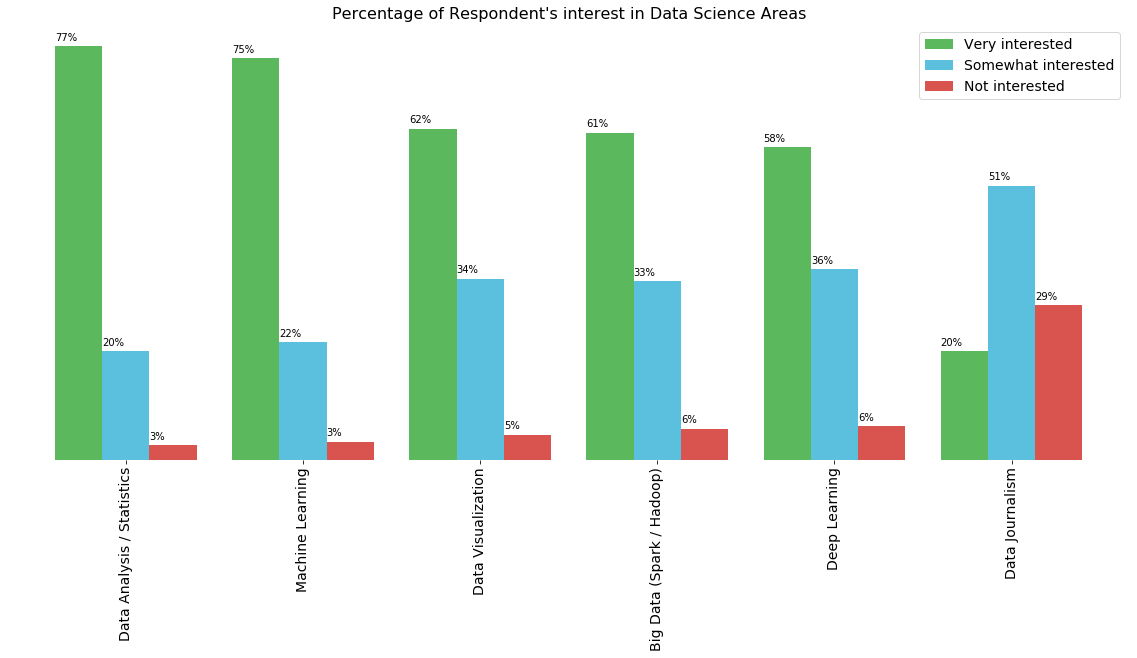

In [5]:
df2 = df.sort_values(by=['Very interested'],ascending=False)
color = ['#5cb85c','#5bc0de','#d9534f']

a = (df2.div(df2.sum(1),axis=0)).plot(kind = 'bar', figsize = (20,8),width = 0.8,color =color,edgecolor=None)
plt.legend(labels = df2.columns,fontsize=14)
a.set_title('Percentage of Respondent\'s interest in Data Science Areas',fontsize = 16)

plt.xticks(fontsize=14)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in a.patches:
    width, height = p.get_width(),p.get_height()
    x,y = p.get_xy()
    a.annotate('{:.0%}'.format(height), (x,y+height+0.01))


### Question 3:

In [6]:
df3= pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df3.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [7]:
x=df3.PdDistrict.value_counts()
t=pd.DataFrame(data=x.values, index=x.index, columns=['Count'])
t=t.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE","BAYVIEW"])
t=t.reset_index()
t.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
t

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


### Question 4:

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes


Solving environment: / 

In [8]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
gjson = r'https://cocl.us/sanfran_geojson'
latitude = 37.77
longitude = -122.42
map= folium.Map(location = [latitude,longitude], zoom_start = 12)


In [ ]:
map.choropleth(
    geo_data=gjson,
    data=t,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
map